In [0]:
import matplotlib.pyplot as plt
import numpy as np


In [0]:
trails=100000
eps=[0,0.1,0.3,0.5,0.7,1]
Bprob=[0.3,0.35,0.5]

In [0]:
class Bandit():
  def __init__(self,p):
    self.p=p
    self.p_estimate=0
    self.N=0

  def  pull(self):
    return np.random.normal(self.p,0.1) 

  def update(self,x):
    self.N=self.N+1
    self.p_estimate=((self.p_estimate*(self.N-1))+x)/self.N



optimal arm is  2
---------------------------
For epsilon: 0
mean_estimate= 0.29997288112882553
mean_estimate= 0
mean_estimate= 0
total reward earned: 29997.28811288283
overall win rate: 0.2999728811288283
num_times_explored: 0
num_times_exploited: 100000
num times selected optimal bandit: 0
100000
------------------------------------------------
For epsilon: 0.1
mean_estimate= 0.2999230667810681
mean_estimate= 0.3504440467854417
mean_estimate= 0.4997831510280426
total reward earned: 48791.30775800642
overall win rate: 0.4879130775800642
num_times_explored: 10119
num_times_exploited: 89881
num times selected optimal bandit: 93224
100000
------------------------------------------------
For epsilon: 0.3
mean_estimate= 0.2998519928876258
mean_estimate= 0.3493630660018791
mean_estimate= 0.49986568656849056
total reward earned: 46494.508835911794
overall win rate: 0.46494508835911796
num_times_explored: 29963
num_times_exploited: 70037
num times selected optimal bandit: 80077
100000
-------

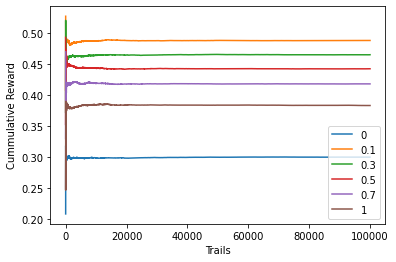

In [253]:
from __future__ import print_function, division
from builtins import range
from random import randrange

def experiment():
  bdt=[Bandit(p) for p in Bprob ]
  # reward=np.zeros(trails)
  # num_explored=0
  # num_exploited=0
  # num_optimal=0
  optimalarm = np.argmax([b.p for b in bdt])
  print("optimal arm is ",optimalarm)
  print("---------------------------")
  

 

  for o in eps:
    reward=np.zeros(trails)
    num_explored=0
    num_exploited=0
    num_optimal=0

    for i in range(trails):
      if np.random.random()<o:
        j=randrange(len(bdt))
        num_explored+=1
      else:
        j=np.argmax([b.p_estimate for b in bdt])
        num_exploited+=1
      
      if j==optimalarm:
        num_optimal+=1
      
      rew = bdt[j].pull()
      reward[i]=rew
      bdt[j].update(rew)
    print("For epsilon:",o)
    for b in bdt:
      print("mean_estimate=",b.p_estimate)

    print("total reward earned:", reward.sum())
    print("overall win rate:", reward.sum() / trails)
    print("num_times_explored:", num_explored)
    print("num_times_exploited:", num_exploited)
    print("num times selected optimal bandit:", num_optimal)
    print(num_explored+num_exploited)
    print("------------------------------------------------")

    cumulative_rewards = np.cumsum(reward)
    y=[i for i in range(trails)]
    
    win_rates = cumulative_rewards / (np.arange(trails) + 1)
    # print(len(win_rates))
    # print(len(y))
    # print(win_rates[0:100])
    # # for i in range(len(reward)):
    # #   reward[i]=reward[i]+reward[i-1]
    plt.plot(y,win_rates,label=o)
    
    # plt.plot(np.ones(trails)*np.max(Bprob))
    plt.legend()
  plt.ylabel('Cummulative Reward')
  plt.xlabel('Trails')
  plt.show() 
    

if __name__ == "__main__":
  experiment()






In [0]:
# k=0
# for i in range(1000):
#   k+=np.random.normal(0.5,0.01)
# print(k/1000) 